This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of [VGChartz](https://www.vgchartz.com/) and downloaded from [Kaggle.](https://www.kaggle.com/gregorut/videogamesales)

Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

##  Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading & understanding the dataset 

In [2]:
games = pd.read_csv("vgsales.csv")
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
games.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [4]:
games.shape

(16598, 11)

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
games.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

## Cleaning the dataset 

### Dropping irrelevant columns 

In [8]:
games = games.drop(["Rank", "Year"], axis=1)
games.head()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Checking for null values 

In [9]:
games.isnull().sum()

Name             0
Platform         0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [10]:
games = games.dropna()
games.isnull().sum()

Name            0
Platform        0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

### Checking for duplicated values 

In [11]:
games_duplicated_rows = games[games.duplicated()]
print(
    "The number of duplicated rows and columns are {}".format(
        games_duplicated_rows.shape
    )
)

The number of duplicated rows and columns are (1, 9)


In [12]:
games.count()

Name            16540
Platform        16540
Genre           16540
Publisher       16540
NA_Sales        16540
EU_Sales        16540
JP_Sales        16540
Other_Sales     16540
Global_Sales    16540
dtype: int64

In [13]:
games = games.drop_duplicates()
games.count()

Name            16539
Platform        16539
Genre           16539
Publisher       16539
NA_Sales        16539
EU_Sales        16539
JP_Sales        16539
Other_Sales     16539
Global_Sales    16539
dtype: int64

### Detecting & removing outliers 

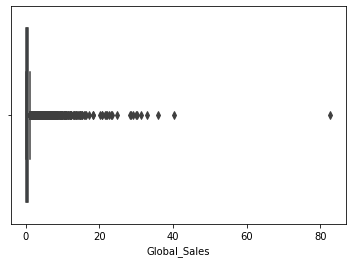

In [14]:
sns.boxplot(games["Global_Sales"])
plt.show()

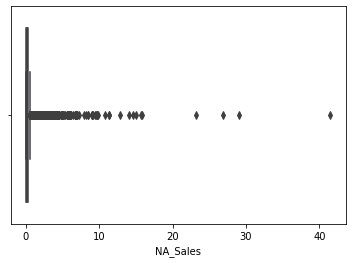

In [15]:
sns.boxplot(games["NA_Sales"])
plt.show()

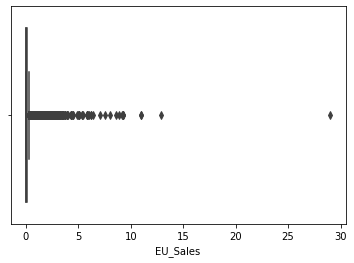

In [16]:
sns.boxplot(games["EU_Sales"])
plt.show()

In [17]:
Q1 = games.quantile(0.25)
Q3 = games.quantile(0.75)

IQR = Q3 - Q1
print(IQR)

NA_Sales        0.24
EU_Sales        0.11
JP_Sales        0.04
Other_Sales     0.04
Global_Sales    0.42
dtype: float64


In [18]:
games.shape

(16539, 9)

In [19]:
games = games[~((games < (Q1 - 1.5 * IQR)) | (games > (Q3 + 1.5 * IQR))).any(axis=1)]
games.shape

(11967, 9)

Nearly 4500 rows containing values (1.5 * IQR) below the 25th percentile or (1.5 * IQR) above the 75th percentile were removed. This helps in keeping the model statistically significant.

## Visualization

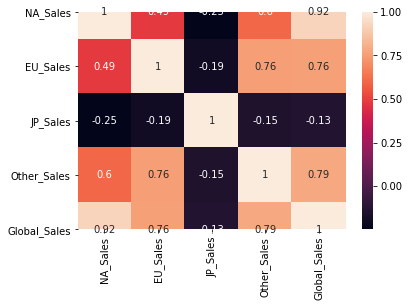

In [20]:
correlation = games.corr()

sns.heatmap(correlation, annot=True)
plt.show()

North American sales has the highest correlation with global sales followed by Other sales and European sales.

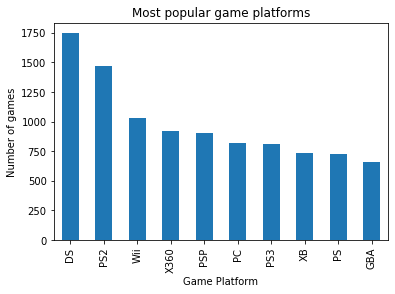

In [21]:
games.Platform.value_counts().nlargest(10).plot(kind="bar")
plt.title("Most popular game platforms")
plt.xlabel("Game Platform")
plt.ylabel("Number of games")
plt.show()

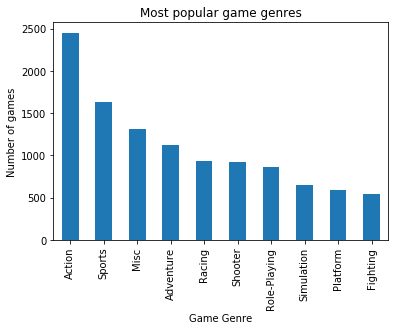

In [22]:
games.Genre.value_counts().nlargest(10).plot(kind="bar")
plt.title("Most popular game genres")
plt.xlabel("Game Genre")
plt.ylabel("Number of games")
plt.show()

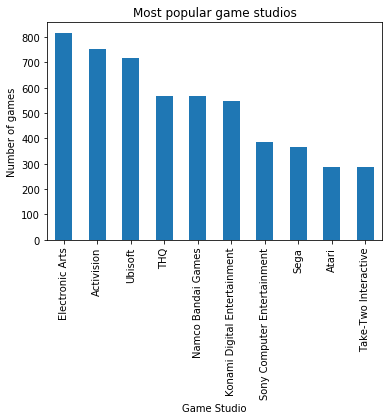

In [23]:
games.Publisher.value_counts().nlargest(10).plot(kind="bar")
plt.title("Most popular game studios")
plt.xlabel("Game Studio")
plt.ylabel("Number of games")
plt.show()

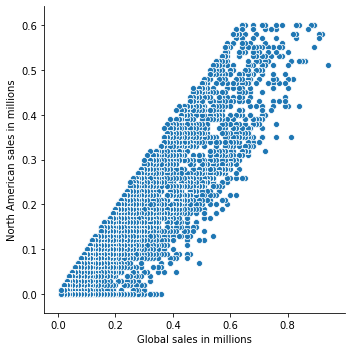

In [24]:
sns.relplot(x="Global_Sales", y="NA_Sales", data=games)
plt.xlabel("Global sales in millions")
plt.ylabel("North American sales in millions")
plt.show()

There is a strong positive correlation between the North American sale of games to its global sales value with a R value of 0.92